# K Nearest Neighbours(KNN)

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd 

# Step 1

In [4]:
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Step 2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [8]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Step 3: Seprate X and Y 

In [9]:
X=df.drop(columns='species')
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
Y=df[['species']]
Y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [11]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

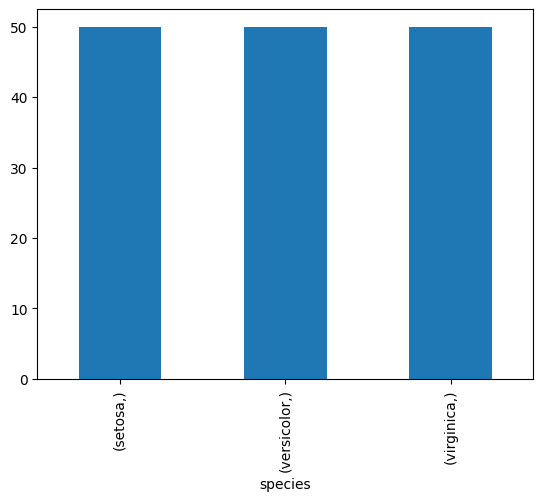

In [12]:
Y.value_counts().plot(kind='bar')

# Step 4: Apply preprocessing on X

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Step 5: Apply Train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y, test_size=0.33, random_state=21)

## Step 6: Model Building

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=1)
model1.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [19]:
model1.score(xtrain,ytrain)

1.0

In [20]:
model1.score(xtest,ytest)

0.94

### Tune the KNN

In [21]:
params={'n_neighbors':[2,3,4,5,6,7,8,9]}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
knn= KNeighborsClassifier()

In [23]:
rscv=RandomizedSearchCV(knn,param_distributions=params,cv=5,scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   scoring='f1_macro')

In [24]:
rscv.best_params_


{'n_neighbors': 3}

In [25]:

rscv.best_score_

0.9696658896658897

In [26]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [27]:

best_knn.score(xtrain, ytrain)

0.97

In [28]:

best_knn.score(xtest, ytest)

0.88

In [29]:

ypred_train1 = best_knn.predict(xtrain)
ypred_test1 = best_knn.predict(xtest)

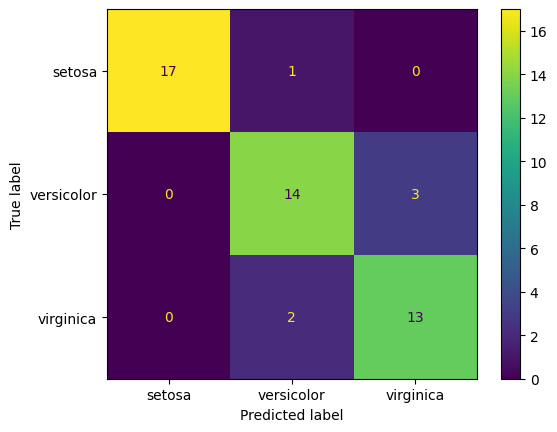

In [30]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)


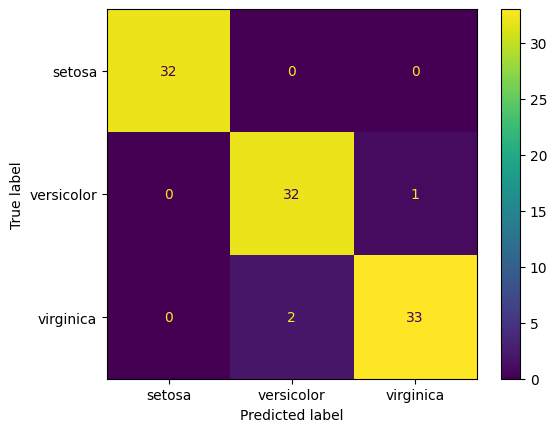

In [31]:

ConfusionMatrixDisplay.from_estimator(best_knn, xtrain, ytrain)

In [32]:

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        18
  versicolor       0.82      0.82      0.82        17
   virginica       0.81      0.87      0.84        15

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



In [33]:

from sklearn.svm import SVC
model_svm = SVC(probability=True)
model_svm.fit(xtrain, ytrain)

SVC(probability=True)

In [34]:

model_svm.score(xtrain, ytrain)


0.97

In [35]:

model_svm.score(xtest, ytest)

0.92

In [36]:

from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(model_svm, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_svm

array([0.90277778, 1.        , 1.        , 0.94871795, 0.94747475])

In [37]:

scores_svm.mean()

0.9597940947940948

In [38]:

scores_knn = cross_val_score(best_knn, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_knn

array([0.95213675, 1.        , 1.        , 0.94871795, 0.94747475])

In [39]:

scores_knn.mean()

0.9696658896658897

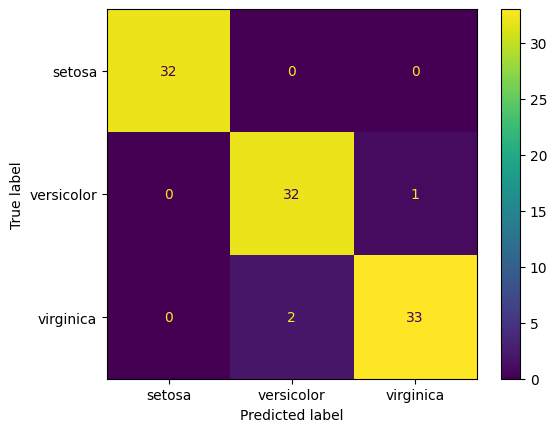

In [40]:

ConfusionMatrixDisplay.from_estimator(model_svm, xtrain, ytrain)

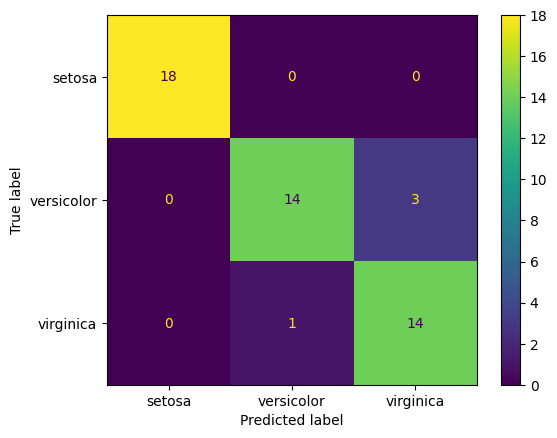

In [41]:

ConfusionMatrixDisplay.from_estimator(model_svm, xtest, ytest)

In [42]:

print(classification_report(ytest, model_svm.predict(xtest)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.82      0.88        17
   virginica       0.82      0.93      0.88        15

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



Select SVM from above because of Higher cross validation score of 0.9224


# Step 8: Perform out of sample predictions


In [43]:

xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [44]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [45]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [46]:

preds = model_svm.predict(xnew_pre)
probs = model_svm.predict_proba(xnew_pre)

In [47]:

model_svm.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [48]:

preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [49]:
probs

array([[0.00943171, 0.93615199, 0.0544163 ],
       [0.01069328, 0.01089817, 0.97840855],
       [0.02560242, 0.95094226, 0.02345532],
       [0.62127397, 0.27904319, 0.09968284],
       [0.0144673 , 0.23254238, 0.75299031],
       [0.94730034, 0.03064833, 0.02205133],
       [0.04063904, 0.94794637, 0.01141458],
       [0.01004121, 0.02494713, 0.96501166],
       [0.95094447, 0.02822119, 0.02083435],
       [0.76181275, 0.17890796, 0.05927929],
       [0.01265607, 0.97511199, 0.01223194],
       [0.01451784, 0.95912895, 0.02635321],
       [0.01491319, 0.01111589, 0.97397092],
       [0.01866014, 0.69681354, 0.28452632],
       [0.01820553, 0.1534518 , 0.82834267]])

In [50]:

import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.93615199, 0.97840855, 0.95094226, 0.62127397, 0.75299031,
       0.94730034, 0.94794637, 0.96501166, 0.95094447, 0.76181275,
       0.97511199, 0.95912895, 0.97397092, 0.69681354, 0.82834267])

In [51]:

xnew['species_pred'] = preds 
xnew['prob'] = max_probs

In [52]:

xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.936152
1,6.9,3.1,5.1,2.3,virginica,0.978409
2,5.1,2.5,3.0,1.1,versicolor,0.950942
3,4.4,2.9,NaN,0.2,setosa,0.621274
4,5.9,3.0,5.1,1.8,virginica,0.752990
5,5.5,3.5,1.3,0.2,setosa,0.947300
6,5.6,NaN,3.6,1.3,versicolor,0.947946
7,6.5,3.0,5.2,2.0,virginica,0.965012
8,5.3,3.7,1.5,0.2,setosa,0.950944
9,5.1,3.4,1.5,NaN,setosa,0.761813


In [53]:
xnew.to_csv('SVMResults.csv', index=False)